In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk memisahkan training data dan testing data
from sklearn.model_selection import train_test_split

# Fungsi untuk memanggil model Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export, export_graphviz, plot_tree
from sklearn.cluster import KMeans

# Fungsi untuk melakukan normalisasi dan standardisasi data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fungsi untuk menghitung evaluation metrics
from sklearn import metrics, datasets

## Multiclass Logistic Regression

Classification - menentukan sebuah data itu masuk kelas / kategori mana

- **Binary Classification**
  > Menentukan sebuah data itu masuk dua kategori (A / B)
  
- **Multiclass Classification**
  > Menentukan sebuah data itu masuk lebih dari dua kategori (A / B / C / ...)

In [2]:
data_iris = datasets.load_iris()

In [6]:
# Define x / feature/ parameters dan y / label / target
x = pd.DataFrame(data_iris['data'], columns=data_iris['feature_names'])
y = pd.DataFrame(data_iris['target'], columns=['type'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Initiate and train the model
model = LogisticRegression()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score: {}'.format(accuracy))

C:\Users\960083.G7481X54_960083\.conda\envs\h8\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score: 0.8333333333333334


In [10]:
model.coef_

array([[-1.04902721,  1.02502481, -1.78547737, -1.64014386],
       [ 0.66348067, -0.41779159, -0.36424012, -0.7697209 ],
       [ 0.38554653, -0.60723322,  2.14971749,  2.40986476]])

In [30]:
model.intercept_

array([-0.4547459 ,  1.76572446, -1.31097856])

f(x1b1 + x2b2 + ... + b0)

In [20]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [23]:
sigmoid(3)

0.9525741268224334

In [ ]:
# [x1, x2, x3] @ [y1, y2, y3] --> (x1.y1) + (x2.y2) + (x3.y3)

In [ ]:
# f1((x1b1 + x2b2 + ...) + b0)

In [37]:
print(sigmoid((model.coef_[0] @ x_test[5]) + model.intercept_[0]))
print(sigmoid((model.coef_[1] @ x_test[5]) + model.intercept_[1]))
print(sigmoid((model.coef_[2] @ x_test[5]) + model.intercept_[2]))

0.04132994793041147
0.7805360492530534
0.8670549710746289


In [36]:
model.predict([x_test[5]])

array([2])

In [38]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



## Decision Tree

- Model machine learning yang agak beda, karena pada Decision Tree:
  - Data tidak perlu distandarisasi

In [53]:
student = pd.read_csv('http://bit.ly/dwp-data-university')

In [70]:
# Define x / feature/ parameters dan y / label / target
x = student.drop(columns=['University Class'])
y = student['University Class']

# Convert research column
def convert_research(row):
    if row['Research'] == 'Y':
        return 1
    return 0

x['Research'] = x.apply(convert_research, axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Initiate and train the model
model = DecisionTreeClassifier()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score: {}'.format(accuracy))

Accuracy score: 0.9545454545454546


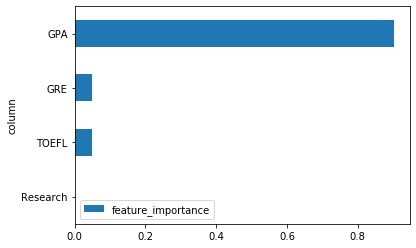

In [67]:
feature_importance = pd.DataFrame({'column': x.columns,
                                   'feature_importance': model.feature_importances_}).sort_values('feature_importance')

feature_importance.plot.barh(x='column', y='feature_importance')

In [81]:
list(x.columns)

['GRE', 'TOEFL', 'GPA', 'Research']

In [82]:
print(export.export_text(model, feature_names=list(x.columns)))

|--- GPA <= 8.59
|   |--- TOEFL <= 102.50
|   |   |--- class: 0
|   |--- TOEFL >  102.50
|   |   |--- GPA <= 7.89
|   |   |   |--- class: 0
|   |   |--- GPA >  7.89
|   |   |   |--- class: 1
|--- GPA >  8.59
|   |--- GRE <= 319.00
|   |   |--- GPA <= 8.88
|   |   |   |--- class: 1
|   |   |--- GPA >  8.88
|   |   |   |--- class: 0
|   |--- GRE >  319.00
|   |   |--- GPA <= 8.70
|   |   |   |--- TOEFL <= 109.50
|   |   |   |   |--- class: 1
|   |   |   |--- TOEFL >  109.50
|   |   |   |   |--- class: 0
|   |   |--- GPA >  8.70
|   |   |   |--- class: 1



In [87]:
export_graphviz(model, feature_names=list(x.columns), out_file='tree.txt')

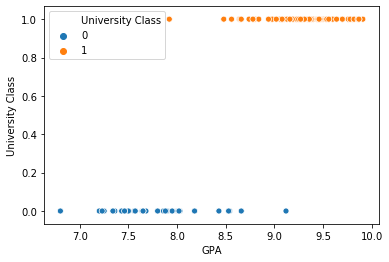

In [101]:
sns.scatterplot(data=student, x='GPA', y='University Class', hue='University Class')

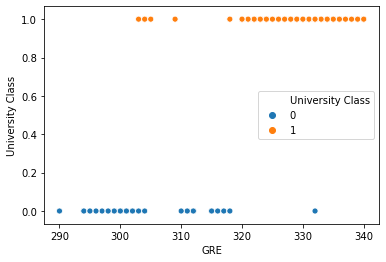

In [102]:
sns.scatterplot(data=student, x='GRE', y='University Class', hue='University Class')

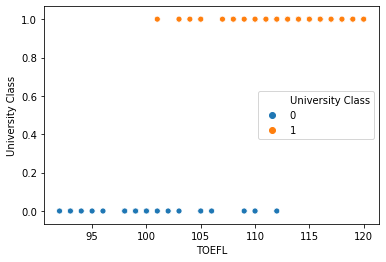

In [103]:
sns.scatterplot(data=student, x='TOEFL', y='University Class', hue='University Class')

## K-Means

In [110]:
df_student = student[['GRE', 'GPA']]

df_student.head()

,GRE,GPA
0,330,9.34
1,302,8.00
2,328,9.50
3,334,9.70
4,336,9.80


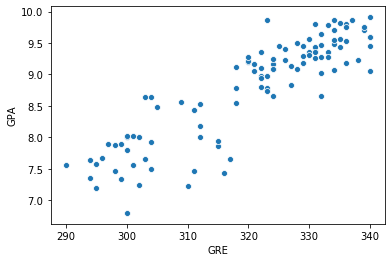

In [163]:
sns.scatterplot(data=df_student, x='GRE', y='GPA')

In [197]:
# Import the data
df_student = student[['GRE', 'GPA']]

# # Scale the data
# scaler = StandardScaler()
# df_student_scaled = scaler.fit_transform(df_student)

# Initiate the model
model = KMeans(n_clusters=2, random_state=1)

# Training process
model.fit(df_student)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

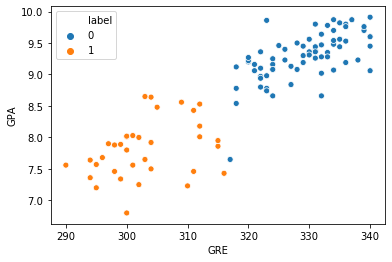

In [198]:
labels = pd.DataFrame(model.labels_, columns=['label'])
labelled_data = pd.concat([df_student, labels], axis=1)

sns.scatterplot(data=labelled_data, x='GRE', y='GPA', hue='label')

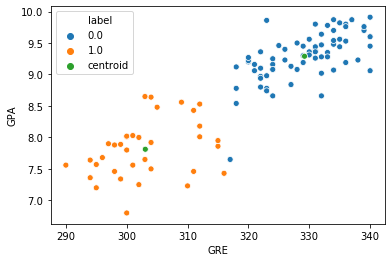

In [209]:
label = pd.DataFrame(model.labels_, columns=['label'])
centroid = pd.DataFrame(model.cluster_centers_, columns=['GRE', 'GPA'])

labelled_data = pd.concat([x, label], axis=1)
labelled_data_centroid = pd.concat([labelled_data, centroid])
labelled_data_centroid = labelled_data_centroid.fillna('centroid')
viz = sns.scatterplot(data=labelled_data_centroid, x='GRE', y='GPA', hue='label')

### Elbow Method
Digunakan untuk mencari jumlah cluster yang paling maksimum

In [154]:
# Inertia for clusters 1 -> 8
# 212, 45, 30, 21, 17, 13, 11, 9

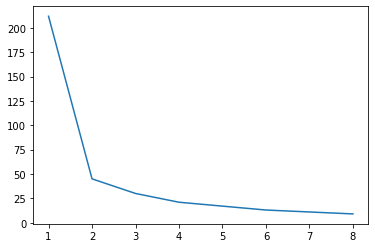

In [155]:
sns.lineplot(x=[1,2,3,4,5,6,7,8], y=[212,45,30,21,17,13,11,9])